In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
import env
import wrangle 
from wrangle import Min_Max_Scaler
# evaluating/modeling methods
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

## Data Acquisition 

In [75]:
df = wrangle.cached_zillow(cached = True)
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,NaN,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,NaN,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,NaN,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,NaN,NaN,6.037232e+13,1772,-0.146056,2017-06-30


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38622 entries, 0 to 38621
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      38622 non-null  int64  
 1   id                            38622 non-null  int64  
 2   airconditioningtypeid         12224 non-null  float64
 3   architecturalstyletypeid      101 non-null    float64
 4   basementsqft                  27 non-null     float64
 5   bathroomcnt                   38622 non-null  float64
 6   bedroomcnt                    38622 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         23706 non-null  float64
 9   calculatedbathnbr             38463 non-null  float64
 10  decktypeid                    333 non-null    float64
 11  finishedfloor1squarefeet      3339 non-null   float64
 12  calculatedfinishedsquarefeet  38509 non-null  float64
 13  f

In [78]:
df.isna().sum()

parcelid                        0
id                              0
airconditioningtypeid       26398
architecturalstyletypeid    38521
basementsqft                38595
                            ...  
taxdelinquencyyear          37354
censustractandblock           144
id.1                            0
logerror                        0
transactiondate                 0
Length: 62, dtype: int64

## Data Preparation

In [3]:
zillow_df = wrangle.clean_zillow(df)

In [45]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,fips,county,age,tax_value,taxes,tax_rate
parcelid,,,,,,,,,
14634203,3,2.0,1125,6059,1286,43,289445,3490.16,1.205811
11721753,3,2.0,1316,6037,3101,94,205123,2627.48,1.280929
11289917,3,2.0,1458,6037,3101,47,136104,2319.90,1.704505
11637029,3,2.0,1766,6037,3101,37,810694,9407.01,1.160365
11705026,2,1.0,1421,6037,3101,106,35606,543.69,1.526962


In [4]:
zillow_df.isnull().sum()

bedrooms       0
bathrooms      0
square_feet    0
fips           0
county         0
age            0
tax_value      0
taxes          0
tax_rate       0
dtype: int64

In [5]:
zillow_df.dtypes

bedrooms         int64
bathrooms      float64
square_feet      int64
fips             int64
county           int64
age              int64
tax_value        int64
taxes          float64
tax_rate       float64
dtype: object

In [6]:
df = zillow_df.drop(columns=['taxes', 'tax_rate'])

In [7]:
train, validate, test = wrangle.split(df)

In [8]:
#check split datasets
print('overall shape of dataframe:', df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

#work w/ training data for data exploration
train.head()

overall shape of dataframe: (34837, 7)
train: (19508, 7)
validate: (8361, 7)
test: (6968, 7)


,bedrooms,bathrooms,square_feet,fips,county,age,tax_value
parcelid,,,,,,,
10712731,3,2.0,1962,6037,3101,54,86942
17139143,2,2.0,1070,6111,2061,39,78600
12488599,2,1.0,1132,6037,3101,75,228724
14308150,2,2.0,1208,6059,1286,37,698413
14444150,3,2.0,1855,6059,1286,52,301297


In [9]:
#set up X inputs and y target variable for each split
X_train = train.drop(columns=['tax_value'])
y_train = train.tax_value
X_validate = validate.drop(columns=['tax_value'])
y_validate = validate.tax_value
X_test = test.drop(columns=['tax_value'])
y_test = test.tax_value

In [11]:
#test scaling function from wrangle.py
X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)
X_train_scaled.head()

,bedrooms,bathrooms,square_feet,fips,county,age
parcelid,,,,,,
10712731,0.333333,0.266667,0.537957,0.000000,1.000000,0.404580
17139143,0.222222,0.266667,0.259294,1.000000,0.426997,0.290076
12488599,0.222222,0.133333,0.278663,0.000000,1.000000,0.564885
14308150,0.222222,0.266667,0.302405,0.297297,0.000000,0.274809
14444150,0.333333,0.266667,0.504530,0.297297,0.000000,0.389313


## Data Exploration

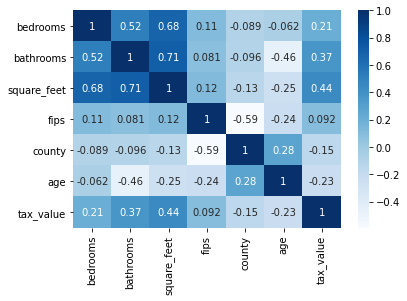

In [12]:
#exploring correlation using heatmap
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.show()

### Continuous and Categorical

In [13]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    '''
    This function will accept my dataframe 
    and the names of the cols that hold the categorical and continuous features,
    and output 3 different plots for visualizing a categorical var and a continuous var
    '''
    sns.barplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.scatterplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.boxplot(data=df, y=continuous_var, x=categorical_var)

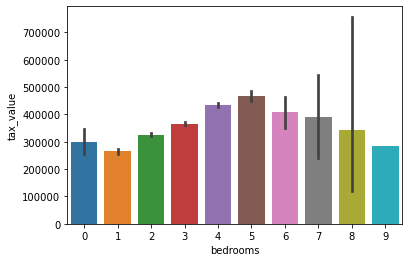

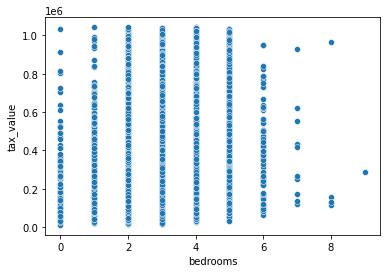

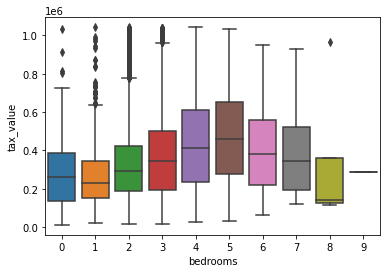

In [14]:
plot_categorical_and_continuous_vars(train, 'bedrooms', 'tax_value')

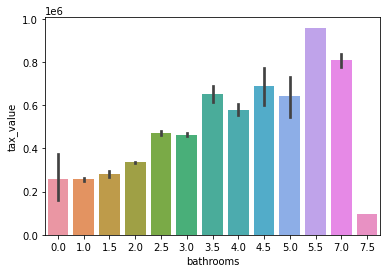

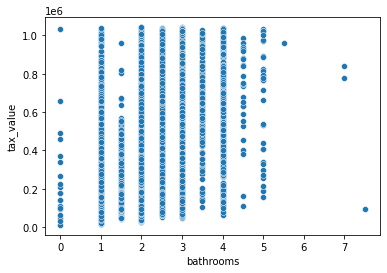

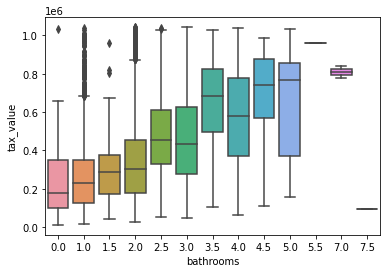

In [15]:
plot_categorical_and_continuous_vars(train, 'bathrooms', 'tax_value')

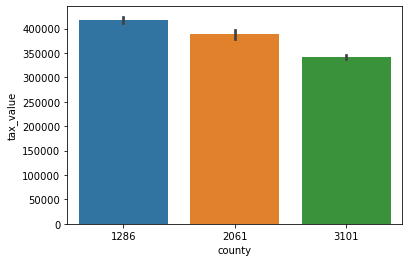

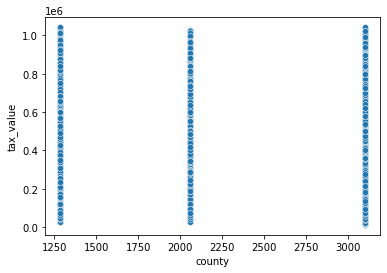

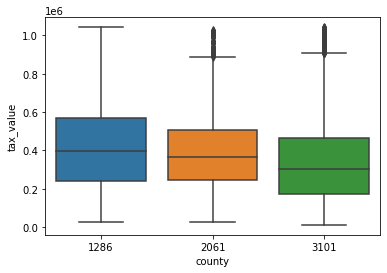

In [16]:
plot_categorical_and_continuous_vars(train, 'county', 'tax_value')

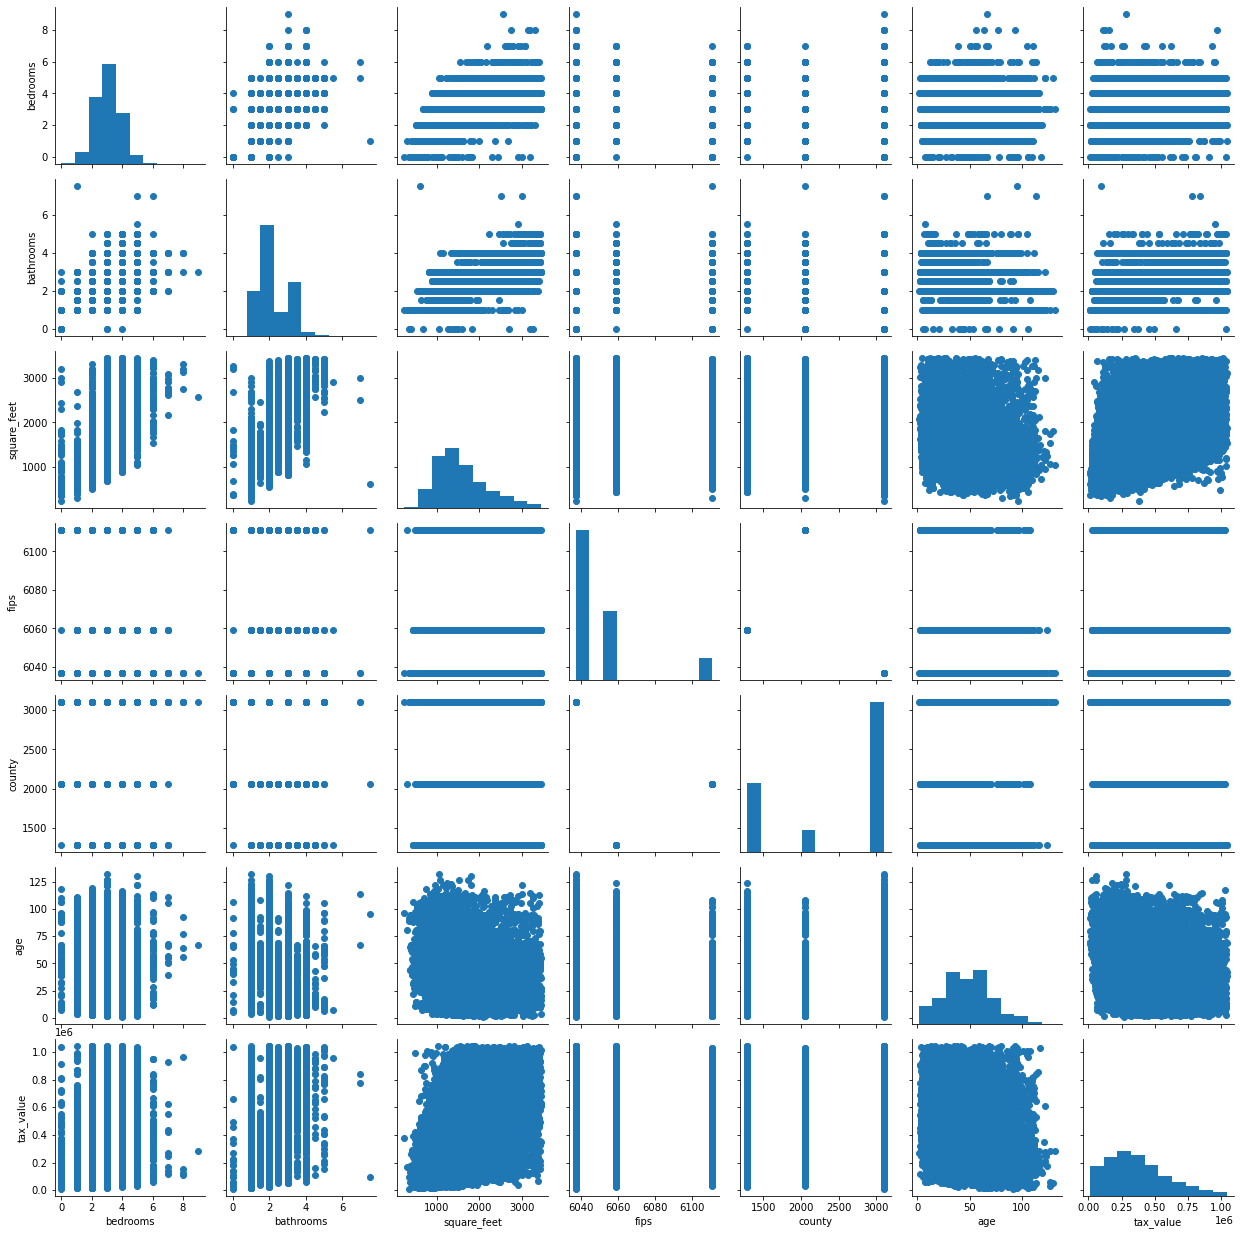

In [17]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

## Hypothesis Testing

### Correlation Test

$H_0$ = There is no relationship between total square footage and tax value

$H_a$ = There is a relationship between total square footage and tax value

In [18]:
#Set confidence interval and alpha for Pearson's Correlation Test
confidence_interval = 0.95
a = 1 - confidence_interval 

#Use personr function
corr, p = stats.pearsonr(train.square_feet, train.tax_value)

print(f"Pearson's correlation coefficient: {corr} and p-value is: {p}")

if p < a:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Pearson's correlation coefficient: 0.4428027976416838 and p-value is: 0.0
We reject the null hypothesis.


In [19]:
α = .05
x = train.fips
y = train.tax_value
r, p = stats.pearsonr(x,y)
print("r correlation coefficient is", r)
print("p-value (probability of seeing the data given the null hypothesis is true) is ", p)
if p < α:
    print("We reject the null hypothesis that there is no relationship between county and tax value.")
else:
    print("We fail to reject the null hypothesis")

r correlation coefficient is 0.09164339386969897
p-value (probability of seeing the data given the null hypothesis is true) is  1.1710567831716353e-37
We reject the null hypothesis that there is no relationship between county and tax value.


## T-Test

$H_0$ = 

$H_a$ = 

In [20]:
train.head()

,bedrooms,bathrooms,square_feet,fips,county,age,tax_value
parcelid,,,,,,,
10712731,3,2.0,1962,6037,3101,54,86942
17139143,2,2.0,1070,6111,2061,39,78600
12488599,2,1.0,1132,6037,3101,75,228724
14308150,2,2.0,1208,6059,1286,37,698413
14444150,3,2.0,1855,6059,1286,52,301297


In [21]:
x1 = train[train.fips  == 6111].tax_value
x2 = train[train.fips == 6037].tax_value
confidence_level = 0.95
a = 0.5
t, p = stats.ttest_ind(x1, x2)
print(t,p)

if p < a:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

8.121804206005875 4.976873417271448e-16
We reject the null hypothesis.


In [22]:
null_hypothesis = "there is no difference in tax value between los angeles county and the rest of the counties"
alternative_hypothesis = "there is a difference in tax value"
confidence_level = .95
alpha = 1 - confidence_level
la_county = train[train.fips  == 6037].tax_value
other_counties = train[train.fips != 6037].tax_value
t, p = stats.ttest_ind(la_county, other_counties)
print(t, p)
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support", alternative_hypothesis)

-20.680342404375658 5.305697388957119e-94
We reject the null hypothesis that there is no difference in tax value between los angeles county and the rest of the counties


In [23]:
##### Takeaways

## Data Modeling and Evaluation

In [24]:
#defining functions to get evaluation metrics for models
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def evaluation_metrics_mean(actual):
    predicted = actual.mean()
    return {'sse': sse(actual, predicted), 
            'mse': mse(actual, predicted), 
            'rmse': rmse(actual, predicted)}

def evaluation_metrics_median(actual):
    predicted = actual.median()
    return {'sse': sse(actual, predicted), 
            'mse': mse(actual, predicted), 
            'rmse': rmse(actual, predicted)}

## Establish/Evaluate a Baseline Model

In [25]:
#Convert y_train and y_validate to dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

#Predict tax_value_pred_mean
tax_value_pred_mean = y_train.tax_value.mean()
y_train['tax_value_pred_mean'] = tax_value_pred_mean
y_validate['tax_value_pred_mean'] = tax_value_pred_mean

#Compute tax_value_pred_median
tax_value_pred_median = y_train.tax_value.median()
y_train['tax_value_pred_median'] = tax_value_pred_median
y_validate['tax_value_pred_median'] = tax_value_pred_median


In [26]:
import math

In [27]:
#Evaluate the baseline model using the mean
evaluation_metrics_mean(y_train.tax_value)

{'sse': 983333176058051.1,
 'mse': 50406662705.456795,
 'rmse': 224514.28174050932}

In [28]:
#Evaluate the baseline model using the median
evaluation_metrics_median(y_train.tax_value)

{'sse': 1005616490831297.0,
 'mse': 51548928174.66152,
 'rmse': 227043.89041474232}

### Findings:

Using mean for baseline

In [29]:
#RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_mean) ** .5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  224514.28 
Validate/Out-of-Sample:  226126.54


In [30]:
#incrementally building a df for comparison of metrics for model selection
metric_df = pd.DataFrame(data = [{'model': 'mean_baseline', 
                                  'RMSE_validate': rmse_validate,
                                  'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_mean)}])

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,226126.536116,0.0


## Linear Regression (OLS)

In [31]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.tax_value)


# predict train
y_train['tax_value_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm) ** (1/2)


# predict validate
y_validate['tax_value_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  196834.97168533588 
Validation/Out-of-Sample:  195982.47785395538


In [32]:
metric_df = metric_df.append({'model': 'OLS Regressor', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_lm)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,226126.536116,0.000000
1,OLS Regressor,195982.477854,0.248837


## LassoLars 

In [33]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data
lars.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['tax_value_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm) ** (1/2)

# predict validate
y_validate['tax_value_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  196834.97168533588 
Validation/Out-of-Sample:  195982.47785395538


In [34]:
metric_df = metric_df.append({'model': 'Lasso alpha 1', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_lars)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,226126.536116,0.000000
1,OLS Regressor,195982.477854,0.248837
2,Lasso alpha 1,195982.477854,0.248813


## TweedieRegressor (GLM)

In [35]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['tax_value_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm) ** (1/2)

# predict validate
y_validate['tax_value_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  197049.85786882832 
Validation/Out-of-Sample:  197049.85786882832


In [36]:
metric_df = metric_df.append({'model': 'GLM (Poisson)', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_glm)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,226126.536116,0.000000
1,OLS Regressor,195982.477854,0.248837
2,Lasso alpha 1,195982.477854,0.248813
3,GLM (Poisson),197049.857869,0.247598


## Polynomial Regression

In [37]:
## Polynomial Features ##
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 =  pf.transform(X_test_scaled)


## LinearRegression ##
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['tax_value_pred_lm2'] = lm2.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.tax_value_pred_lm2) ** (1/2)

# predict validate
y_validate['tax_value_pred_lm2'] = lm2.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.tax_value_pred_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  196834.97168533588 
Validation/Out-of-Sample:  38409131625.77611


In [38]:
metric_df = metric_df.append({'model': 'Quadratic Model', 
                              'RMSE_validate': rmse_validate, 
                              'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.tax_value_pred_lm2)}, ignore_index=True)

metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,2.261265e+05,0.000000
1,OLS Regressor,1.959825e+05,0.248837
2,Lasso alpha 1,1.959825e+05,0.248813
3,GLM (Poisson),1.970499e+05,0.247598
4,Quadratic Model,3.840913e+10,0.248837


## Evaluate
type some stuff here

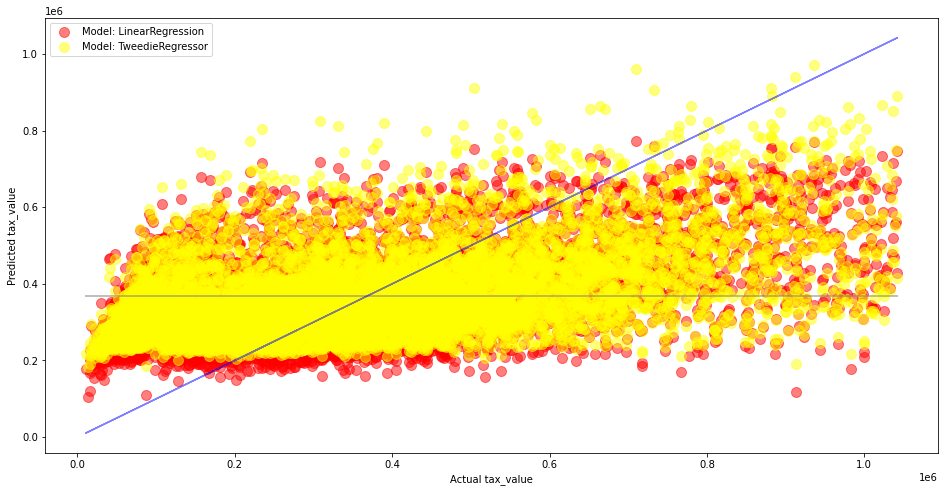

In [39]:
#plotting actual vs predicted values
# y_validate.head()
plt.figure(figsize=(16,8))

plt.plot(y_validate.tax_value, y_validate.tax_value_pred_mean, alpha=.5, color="gray", label='_nolegend_')

plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')

plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")

plt.legend()
plt.xlabel("Actual tax_value")
plt.ylabel("Predicted tax_value")

plt.show()

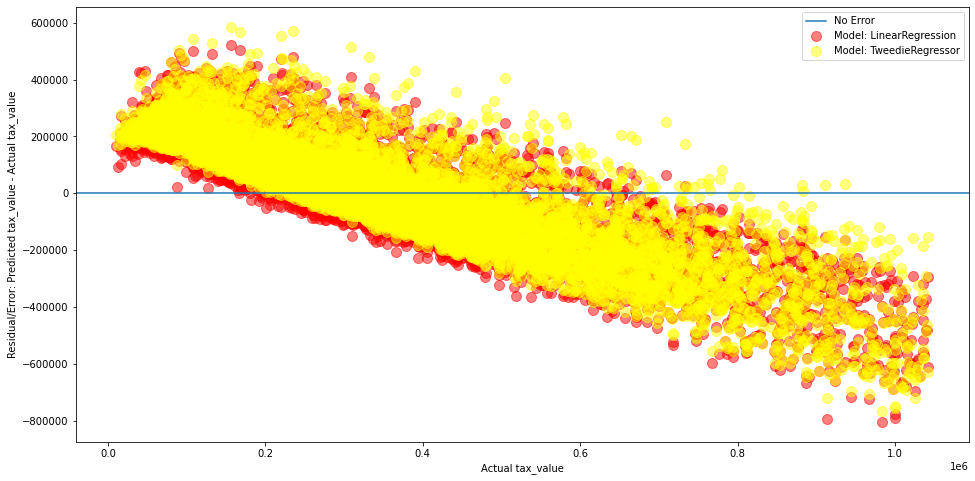

In [40]:
#residual plots: plotting the errors in predictions
# y_validate.head()
plt.figure(figsize=(16,8))

plt.axhline(label="No Error")

plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_lm - y_validate.tax_value, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.tax_value_pred_glm - y_validate.tax_value, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")

plt.legend()
plt.xlabel("Actual tax_value")
plt.ylabel("Residual/Error: Predicted tax_value - Actual tax_value")

plt.show()

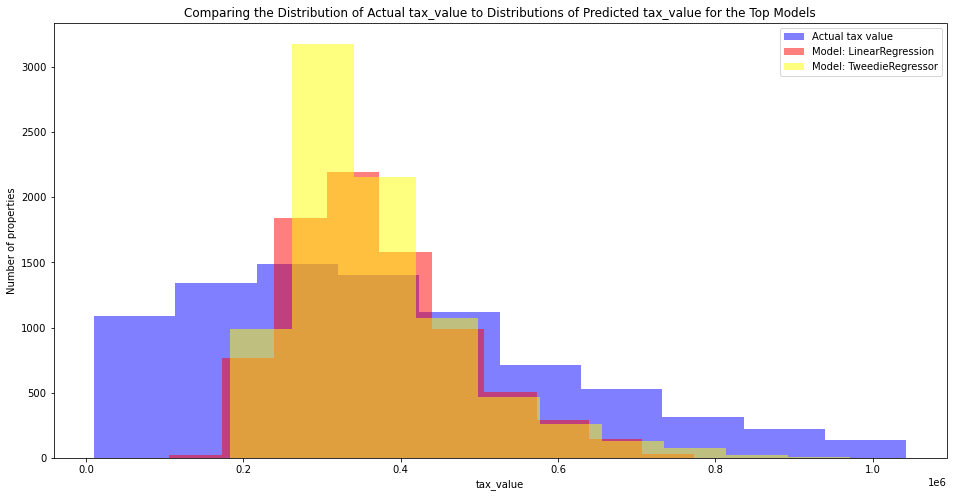

In [41]:
#histogram
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))

plt.hist(y_validate.tax_value, color='blue', alpha=.5, label="Actual tax value")
plt.hist(y_validate.tax_value_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.tax_value_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")

plt.xlabel("tax_value")
plt.ylabel("Number of properties")
plt.title("Comparing the Distribution of Actual tax_value to Distributions of Predicted tax_value for the Top Models")
plt.legend()
plt.show()

In [42]:
#out of sample evaluation
y_test = pd.DataFrame(y_test)

# predict on test
y_test['tax_value_pred_lm'] = lm.predict(X_test_scaled)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.tax_value_pred_lm) ** (1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  196365.27390679737


## Distribution of Tax Rates

In [46]:
zillow_df.head()

,bedrooms,bathrooms,square_feet,fips,county,age,tax_value,taxes,tax_rate
parcelid,,,,,,,,,
14634203,3,2.0,1125,6059,1286,43,289445,3490.16,1.205811
11721753,3,2.0,1316,6037,3101,94,205123,2627.48,1.280929
11289917,3,2.0,1458,6037,3101,47,136104,2319.90,1.704505
11637029,3,2.0,1766,6037,3101,37,810694,9407.01,1.160365
11705026,2,1.0,1421,6037,3101,106,35606,543.69,1.526962


In [48]:
zillow_df['county_name'] = zillow_df['fips'].map({6037: 'Los Angeles', 
                                                           6059: 'Orange', 
                                                           6111: 'Ventura'})
zillow_df.head()

,bedrooms,bathrooms,square_feet,fips,county,age,tax_value,taxes,tax_rate,county_name
parcelid,,,,,,,,,,
14634203,3,2.0,1125,6059,1286,43,289445,3490.16,1.205811,Orange
11721753,3,2.0,1316,6037,3101,94,205123,2627.48,1.280929,Los Angeles
11289917,3,2.0,1458,6037,3101,47,136104,2319.90,1.704505,Los Angeles
11637029,3,2.0,1766,6037,3101,37,810694,9407.01,1.160365,Los Angeles
11705026,2,1.0,1421,6037,3101,106,35606,543.69,1.526962,Los Angeles


In [49]:
zillow_df = zillow_df.drop(columns=['bedrooms', 'bathrooms', 'square_feet', 'age', 'tax_value', 'taxes'])


In [50]:
zillow_df.head()

,fips,county,tax_rate,county_name
parcelid,,,,
14634203,6059,1286,1.205811,Orange
11721753,6037,3101,1.280929,Los Angeles
11289917,6037,3101,1.704505,Los Angeles
11637029,6037,3101,1.160365,Los Angeles
11705026,6037,3101,1.526962,Los Angeles


In [52]:
la_county = zillow_df[zillow_df.fips == 6037]
orange_county = zillow_df[zillow_df.fips == 6059]
ventura_county = zillow_df[zillow_df.fips == 6111]

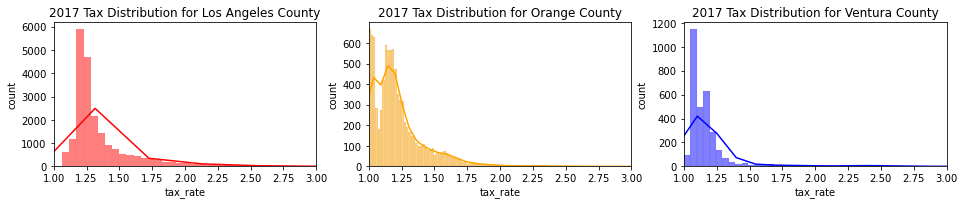

In [74]:
plt.figure(figsize=(16, 9))
plt.subplot(331)
sns.histplot(la_county, x= 'tax_rate', bins=1500, color = 'Red', kde=True)
plt.xlim(1, 3)
plt.ylabel('count')
plt.title('2017 Tax Distribution for Los Angeles County')
plt.subplot(332)
sns.histplot(orange_county, x='tax_rate', bins=600, color = 'Orange', kde=True)
plt.xlim(1, 3)
plt.ylabel('count')
plt.title('2017 Tax Distribution for Orange County')
plt.subplot(333)
sns.histplot(ventura_county, x='tax_rate', bins=600, color = 'Blue', kde=True)
plt.xlim(1, 3)
plt.ylabel('count')
plt.title('2017 Tax Distribution for Ventura County')

plt.savefig('taxrates.png')
